In [0]:
!pip3 install torch==1.4 torchvision==0.5.0

     |████████████████████████████████| 753.4MB 21kB/s 
     |████████████████████████████████| 4.0MB 34.4MB/s 
  Found existing installation: torch 1.5.0+cu101
    Uninstalling torch-1.5.0+cu101:


In [0]:
from fastai.vision import *
import os
import numpy as np

Get path

In [0]:
pwd

'/content'

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
path_img = '/content/drive/My Drive/Course/CS230/FastAI/images'
path_lbl = '/content/drive/My Drive/Course/CS230/FastAI/labels'
get_label=lambda x: path_lbl/f'{x.stem}_P{x.suffix}'
path_img

'/content/drive/My Drive/Course/CS230/FastAI/images'

Get Data

In [0]:
fnames = get_image_files(path_img)
fnames[:3]

[PosixPath('/content/drive/My Drive/Course/CS230/FastAI/images/NanoC700.png'),
 PosixPath('/content/drive/My Drive/Course/CS230/FastAI/images/NanoC800.png'),
 PosixPath('/content/drive/My Drive/Course/CS230/FastAI/images/NanoC900.png')]

In [0]:
lbl_names = get_image_files(path_lbl)
lbl_names[:3]

[PosixPath('/content/drive/My Drive/Course/CS230/FastAI/labels/NanoC700_P.png'),
 PosixPath('/content/drive/My Drive/Course/CS230/FastAI/labels/NanoC800_P.png'),
 PosixPath('/content/drive/My Drive/Course/CS230/FastAI/labels/NanoC900_P.png')]

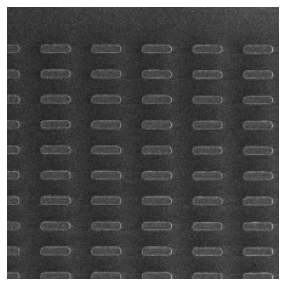

In [0]:
img_f = fnames[31]
img = open_image(img_f)
img.show(figsize=(5,5))

In [0]:
get_y_fn = lambda x: path_lbl+'/'+x.stem+'_P'+x.suffix

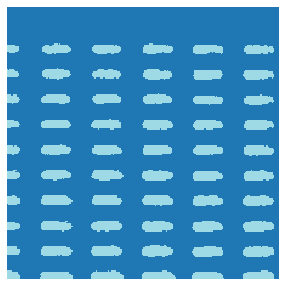

In [0]:
mask = open_mask(get_y_fn(img_f))
mask.show(figsize=(5,5), alpha=1)

In [0]:
src_size = np.array(mask.shape[1:])
src_size,mask.data

(array([224, 224]), tensor([[[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]]]))

In [0]:
src = (SegmentationItemList.from_folder(path_img)
       .split_by_rand_pct(0.2)
       .label_from_func(get_y_fn, classes=['outer','inter']))

In [0]:
bs=4
data = (src.transform(get_transforms(), tfm_y=True)
        .add_test_folder('/content/drive/My Drive/Course/CS230/FastAI/test2', tfms=None, tfm_y=False)
        .databunch(bs=bs)
        .normalize(imagenet_stats))

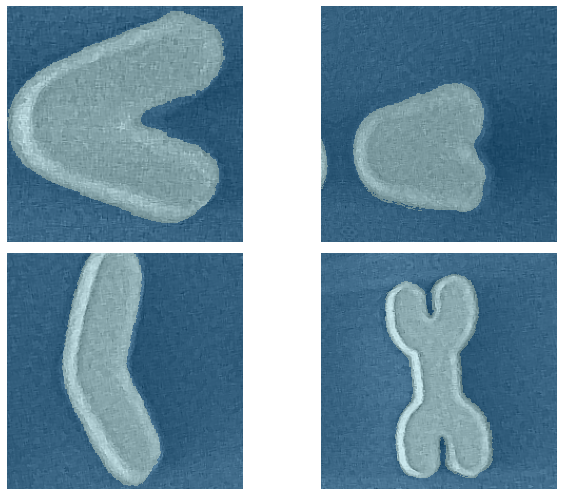

In [0]:
data.show_batch(2, figsize=(10,7))

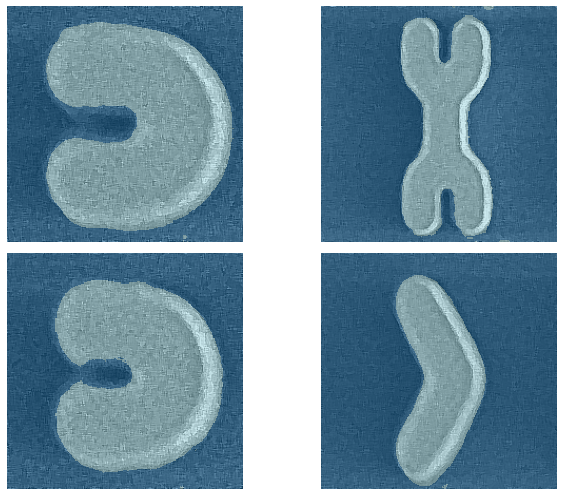

In [0]:
data.show_batch(2, figsize=(10,7), ds_type=DatasetType.Valid)

Model

In [0]:
#defaults.device = torch.device('cpu')

In [0]:
def acc_camvid(input, target):
    target = target.squeeze(1)
    mask = target != 0
    return (input.argmax(dim=1)[mask]==target[mask]).float().mean()

In [0]:
metrics=acc_camvid

In [0]:
wd=1e-2

In [0]:
learn = unet_learner(data, models.resnet34, metrics=metrics, wd=wd)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


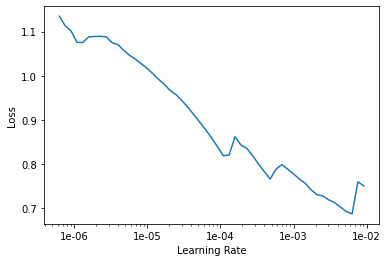

In [0]:
lr_find(learn)
learn.recorder.plot()

In [0]:
lr=1e-3

In [0]:
learn.fit_one_cycle(100, slice(lr))

epoch,train_loss,valid_loss,acc_camvid,time
0,0.801319,0.707964,0.166213,00:02
1,0.652547,0.531256,0.927271,00:01
2,0.548863,0.386709,0.830533,00:01
3,0.497967,0.451871,0.596341,00:01
4,0.445901,0.320167,0.893308,00:01
5,0.393844,0.516243,0.763395,00:01
6,0.340950,0.264024,0.883603,00:01
7,0.308026,0.277786,0.856873,00:01
8,0.278477,0.200457,0.904764,00:01
9,0.253874,0.342257,0.849535,00:01


In [0]:
learn.save('stage-1')

In [0]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (26 items)
x: SegmentationItemList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: SegmentationLabelList
ImageSegment (1, 224, 224),ImageSegment (1, 224, 224),ImageSegment (1, 224, 224),ImageSegment (1, 224, 224),ImageSegment (1, 224, 224)
Path: /content/drive/My Drive/Course/CS230/FastAI/images;

Valid: LabelList (6 items)
x: SegmentationItemList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: SegmentationLabelList
ImageSegment (1, 224, 224),ImageSegment (1, 224, 224),ImageSegment (1, 224, 224),ImageSegment (1, 224, 224),ImageSegment (1, 224, 224)
Path: /content/drive/My Drive/Course/CS230/FastAI/images;

Test: LabelList (1 items)
x: SegmentationItemList
Image (3, 512, 512)
y: EmptyLabelList

Path: /content/drive/My Drive/Course/CS230/FastAI/images, model=DynamicUnet(
  (layers): ModuleList(
    (0): Sequential(
      (0): Conv2d(

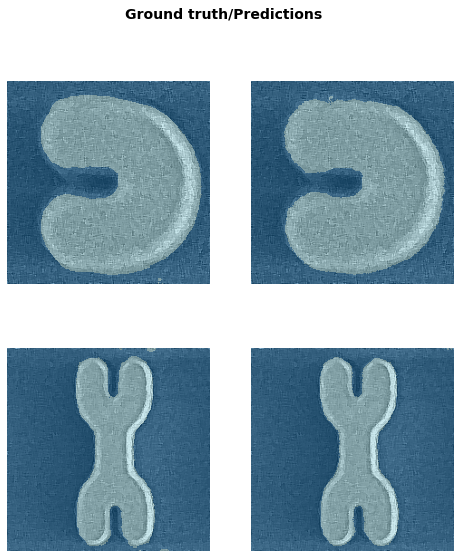

In [0]:
learn.show_results(rows=2, figsize=(8,9))

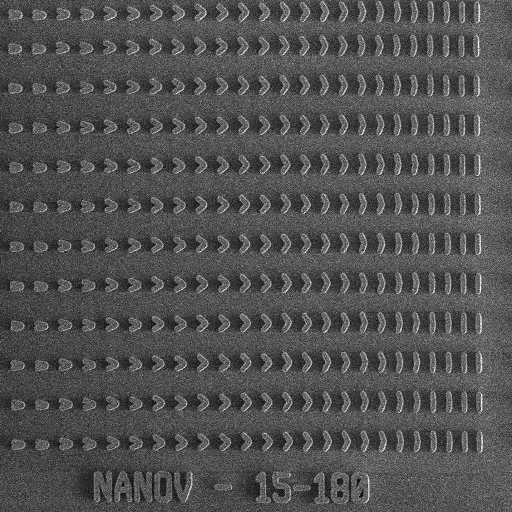

In [0]:
i =0
data = learn.data.test_ds[i][0]
data

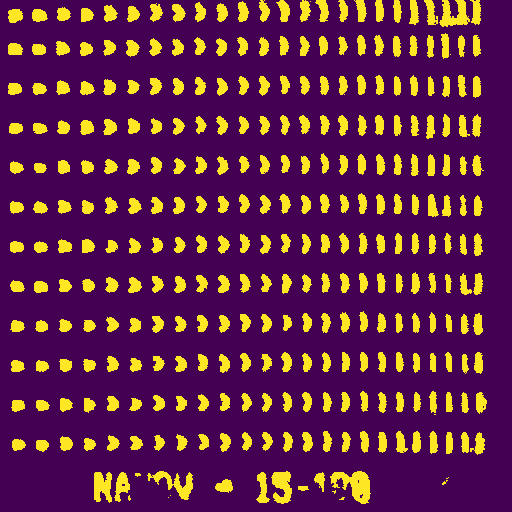

In [0]:
pred = learn.predict(data)
pred[0]

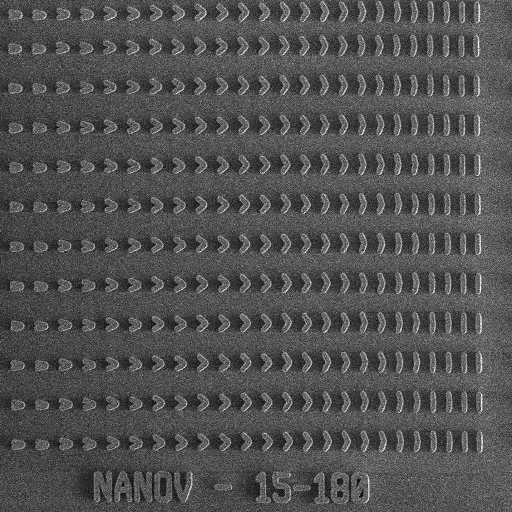

In [0]:
data

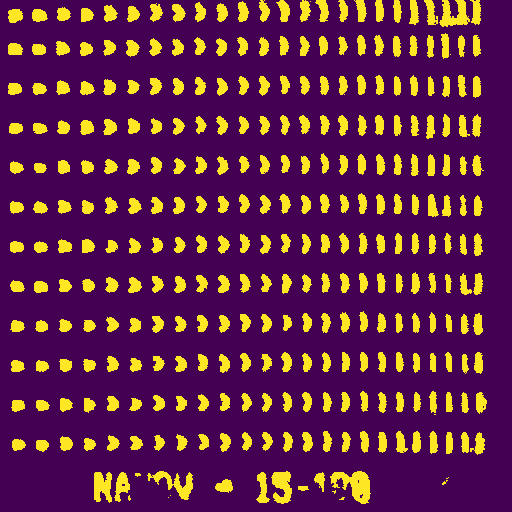

In [0]:
pred = learn.predict(data)
pred[0]